# Pràctica 8: Fitxers
### Exercici 1: Fitxers de text bàsics
#### Programa 1
A la primera casella, llegim l'arxiu i generem la funció, i, a la segona, la corregim.

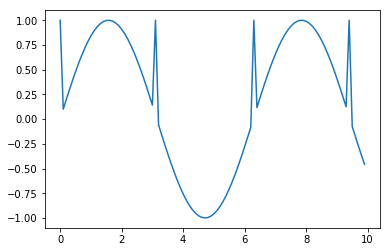

In [2]:
import matplotlib.pyplot as plt  # Importem la llibreria de matplotlib.

eix_x = []  # Creem els dos vectors per als eixos.
eix_y = []
with open('FitxerSin.txt', 'r') as llegir:  # Obrim el fitxer per llegir-lo.
    for line in llegir.readlines():  # Seleccionem cada línia.
        Net = line.strip()  # Treiem els espais de cada línia.
        Endreçat = Net.split('\t')  # Separem cada columna de la línia amb un tabulador.
        eix_x.append(float(Endreçat[0]))  # Afegim les dues columnes, per separat, als vectors.
        eix_y.append(float(Endreçat[1]))
plt.plot(eix_x, eix_y)  # Creem la gràfica.
plt.show()  # Ensenyem la gràfica.

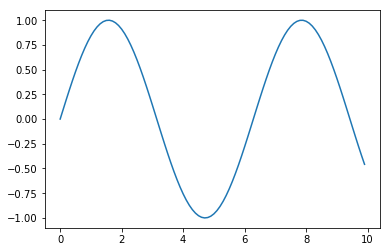

In [3]:
import matplotlib.pyplot as plt  # Repetim el procés anterior.

eix_x = []
eix_y = []
with open('FitxerSin.txt', 'r') as llegir:
    for line in llegir.readlines():
        Net = line.strip()
        Endreçat = Net.split('\t')
        eix_x.append(float(Endreçat[0]))
        eix_y.append(float(Endreçat[1]))
eix_y[0] = 0  # Substituïm els valors erronis.
eix_y[1] = (eix_y[0] + eix_y[2]) / 2
eix_y[31] = (eix_y[30] + eix_y[32]) / 2
eix_y[63] = (eix_y[62] + eix_y[64]) / 2
eix_y[94] = (eix_y[93] + eix_y[95]) / 2
plt.plot(eix_x, eix_y)
plt.show()
with open('FitxerSinMod.txt', 'w') as escriure:  # Obrim l'arxiu per corregir-lo.
    for dataX, dataY in zip(eix_x, eix_y):  # Reescribim l'arxiu.
        escriure.write(str(dataX) + "\t" + str(dataY) + "\n")

#### Programa 2
Creem el comptador de paraules fent-li comptar totes les lletres seguides per un separador de paraula (" ", ",", ";"...), el de caràcters mesurant la longitud de les strings i el de línies mitjançant la mateixa estructura en bucle del programa.

In [4]:
def compta_paraules (text):  # Creem la funció per a comptar les paraules.
    comptador = 0  # Iniciem un comptador.
    for i in range(0, len(text) - 1):  # Fem iterar per a tots els caràcters.
        if text[i] != ',' and text[i] != '.' and text[i] != ' ' and text[i] != ';' and text[i] != '\n' and text[i] != "'":
            if text[i+1] == ',' or text[i+1] == '.' or text[i+1] == ' ' or text[i+1] == ';' or text[i+1] == '\n' or text[i+1] == "'":
                comptador = comptador + 1  # Afegim 1 al comptador per cada caràcter fonètic seguit de separador.
    return comptador

total = 0  # Iniciem 3 comptadors.
linies = 0
totchar = 0
lectura = input("Quin fitxer hem de llegir? ")  # Demanem quin fitxer s'ha de llegir.
with open(lectura, 'r') as llibre:  # Obrim el fitxer seleccionat.
    for line in llibre.readlines():  # Llegim cada línia del text.
        total = total + compta_paraules (line)  # Afegim les paraules de cada línia al seu comptador.
        linies = linies + 1  # Sumem un al comptador de línies.
        totchar = totchar + len(line) - 1  # Afegim la longitud de la línia al comptador de caraàcters, menys 1 pel salt de línia.
    print ('Total de caràcters: ', str(totchar), "\nTotal de paraules: ", str(total), "\nTotal de línies: ", str(linies))  # Imprimim els  comptadors.                

Quin fitxer hem de llegir? Labs_p8_E1.txt
Total de caràcters:  2954 
Total de paraules:  450 
Total de línies:  9


### Exercici 2: json
#### Programa 1
Generem els quatre vectors mitjançant bucles i condicionals, i els gravem al fitxer json.

In [5]:
import json  # Importem les biblioteques necessàries.
import math

vec1 = []  # Iniciem el vector 1.
i = 0  # Iniciem un comptador i.
while i <= 350:  # Iterem per la variable i fins al rang.
    vec1.append(i)  # Li afegim la dada al vector.
    i = i + 5  # Canviem i.
vec2 = []  # Inicem el vector 2.
for i in range (0, len(vec1)):  # Fem iterar el vector 2, afegint-hi, per a cada angle, el seu quadrant.
    if vec1[i] == 0:
        vec2.append('pz')
    elif vec1[i] < 90 and vec1[i] > 0:
        vec2.append('pp')
    elif vec1[i] == 90:
        vec2.append('zp')
    elif vec1[i] > 90 and vec1[i] < 180:
        vec2.append('np')
    elif vec1[i] == 180:
        vec2.append('nz')
    elif vec1[i] > 180 and vec1[i] < 270:
        vec2.append('nn')
    elif vec1[i] == 270:
        vec2.append('zn')
    else:
        vec2.append('pn')
vec3 = []  # Iniciem el vector 3.
for i in range (0, len(vec1)):  # Fem iterar i.
    vec3.append(math.cos(vec1[i]*math.pi/180))  # Afegim a cada angle, el seu cosinus al vector 3.
vec4 = []  # Repetim el procés per al sinus i el vector 4.
for i in range (0, len(vec1)):
    vec4.append(math.sin(vec1[i]*math.pi/180))
with open('hola.json', 'w') as llibreta:  # Obrim un nou fitxer, per a escriure-hi.
    json.dump({'vector 1': vec1, 'vector 2': vec2, 'vector 3': vec3, 'vector 4': vec4}, llibreta)  # Escribim al fitxer els vectors.

#### Programa 2
Llegim l'arxiu que hem creat, n'extraiem els vectors i els retornem al format d'origen, que s'ha perdut en crear l'arxiu.

In [6]:
import json  # Importem la llibreria.
with open('hola.json', 'r') as llibreta:  # Obrim l'arxiu per a llegir-lo.
    vectors = json.load(llibreta)  # Carreguem el contingut.
    vec1 = vectors['vector 1']  # Seleccionem el vector 1.
    for i in range (0, len(vec1)):
        vec1[i] = int(vec1[i])  # Convertim el vector 1 al format desitjat.
    vec2 = vectors['vector 2']  # Extraiem el vector 2.
    vec3 = vectors['vector 3']  # Extraiem i convertim el vector 3.
    for i in range (0, len(vec3)):
        vec3[i] = float(vec3[i])
    vec4 = vectors['vector 4']  # Extraiem i compartim el vector 4.
    for i in range (0, len(vec4)):
        vec4[i] = float(vec4[i])
print (" ", vec1, "\n", vec2, "\n", vec3, "\n", vec4)  # Imprimim els vectors per comprovar el funcionament.

  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350] 
 ['pz', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'zp', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'nz', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'zn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn'] 
 [1.0, 0.9961946980917455, 0.984807753012208, 0.9659258262890683, 0.9396926207859084, 0.9063077870366499, 0.8660254037844387, 0.8191520442889918, 0.766044443118978, 0.7071067811865476, 0.6427876096865394, 0.5735764363510462, 0.5000000

### Exercici 3: Text estructurat
#### Primer programa
Fem pràcticament el mateix que al 2.1, però en un arxiu txt i estructurant cada columna amb tabuladors. Addicionalment, Limitem els decimals de les funcions trigonomètriques a 4.

In [7]:
import json  # Importem json.

with open('DefinitelyNotJson.txt', 'w') as escriure:  # Obrim l'arxiu nou.
    for dataX, dataY, dataZ, dataN in zip(vec1, vec2, vec3, vec4):  # Iterem en zip pels vectors del quadre anterior.
        escriure.write(str(dataX) + "\t" + str(dataY) + "\t" + "{0:.4f}".format(dataZ) + "\t" + "{0:.4f}".format(dataN) + "\n")  # Gravem els vectors com a text esctructurat.

#### Segon programa
Seguint un procés similar al 1.1, extraiem els vectors de l'arxiu anterior i els donem format.

In [8]:
vec1 = []  # Inicialitzem els 4 vectors.
vec2 = []
vec3 = []
vec4 = []
with open('DefinitelyNotJson.txt', 'r') as llibreta:  # Obrim l'arxiu per llegir-lo.
    for line in llibreta.readlines():  # Seleccionem cada línia.
        Net = line.strip()  # Li treiem els espais.
        Endreçat = Net.split('\t')  # Tabulem entre les columnes.
        vec1.append(int(Endreçat[0]))  # Extraiem el vector 1 i el convertim en int.
        vec2.append(Endreçat[1])  # Extraiem el vector 2.
        vec3.append(float(Endreçat[2]))  # Extraiem el vector 3 i el convertim en float.
        vec4.append(float(Endreçat[3]))  # Ídem pel vector 4.
print (vec1)  # Imprimim els vectors creats.
print (vec2)
print (vec3)
print (vec4)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350]
['pz', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'zp', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'nz', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'zn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn']
[1.0, 0.9962, 0.9848, 0.9659, 0.9397, 0.9063, 0.866, 0.8192, 0.766, 0.7071, 0.6428, 0.5736, 0.5, 0.4226, 0.342, 0.2588, 0.1736, 0.0872, 0.0, -0.0872, -0.1736, -0.2588, -0.342, -0.4226, -0.5, -0.5736, -0.6428, -0.7071, -0.766, -0.8192, -0.8

### Exercici 4: CSV
#### Programa 1
Formategem els arxius segons locale i els escribim a una llibreta, fent servir els comandaments de csv.

In [17]:
import locale  # Importem les llibreries.
import csv

vec_1 = [locale.str(value) for value in vec1]  #Creem els vectors nous, d'string.
vec_2 = [value for value in vec2]
vec_3 = [locale.str(value) for value in vec3]
vec_4 = [locale.str(value) for value in vec4]
locale.setlocale(locale.LC_ALL, '')  # Preparem el locale.
with open('holahola.csv', 'w') as llibreta:  # Obrim el nou fitxer, per escriure-hi.
    escriure = csv.writer(llibreta, delimiter = ';')  # Creem l'escriptor.
    for dataX, dataY, dataZ, dataN in zip(vec_1, vec_2, vec_3, vec_4): # Iterem segons el zip dels vectors.
        llibreta.write(str(dataX) + ";" + str(dataY) + ";" + str(dataZ) + ";" + str(dataN) + "\n")  # Escribim a la llibreta.

#### Programa 2
Fem exactament el mateix que als anteriors programes de lectura, però adaptant-los a les vicissituds del csv.

In [18]:
import locale  # Importem les llibreries i preparem el locale.
import csv
locale.setlocale(locale.LC_ALL, '')

lines = []  # Creem la llista per a les línies.
with open('holahola.csv', 'r') as llibre:  #Obrim l'arxiu per a llegir-lo.
    llegir = csv.reader(llibre, delimiter = ';', quotechar = "\n")  # Creem el lector.
    for line in llegir:
        lines.append(line)  # Iterant les línies, les separem.
vec1 = [locale.atoi(lines[i][0]) for i in range(len(lines))]  # Extraiem la primera columna, i la convertim a int.
vec2 = [lines[i][1] for i in range(len(lines))]  # Extraiem la segona columna.
vec3 = [locale.atof(lines[i][2]) for i in range(len(lines))]  # Extraiem la tercera columna, i la convertim a float.
vec4 = [locale.atof(lines[i][3]) for i in range(len(lines))]  # Ídem per la quarta columna.
print (vec1)  # Imprimim els vectors.
print (vec2)
print (vec3)
print (vec4)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350]
['pz', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'pp', 'zp', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'np', 'nz', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'zn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn', 'pn']
[1.0, 9962.0, 9848.0, 9659.0, 9397.0, 9063.0, 866.0, 8192.0, 766.0, 7071.0, 6428.0, 5736.0, 5.0, 4226.0, 342.0, 2588.0, 1736.0, 872.0, 0.0, -872.0, -1736.0, -2588.0, -342.0, -4226.0, -5.0, -5736.0, -6428.0, -7071.0, -766.0, -8192.0, -866.0

### Pregunta!

No, no podem fer servir el mateix programa per llegir els fitxers dels exercicis 2, 3 i 4 perquè hem treballat en formats diferents incompatibles.